In [1]:
import pickle
import numpy as np
import pandas as pd
# 指定.pkl文件的路径
# file_path = 'data/census13/original.pkl'
# file_path = 'data/census13/workload/lstm-1k0311.pkl'
file_path = 'data/census13/lstm/original+original_ind_0.1_lstm-1k-IND0.1_200_123.pkl'
# file_path = 'data/census13/workload/lstm-10-IND0.1-original+original_ind_0.1-label.pkl'

# 打开文件并读取数据
with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [3]:
data['valid'][4]

[54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703,
 54703]

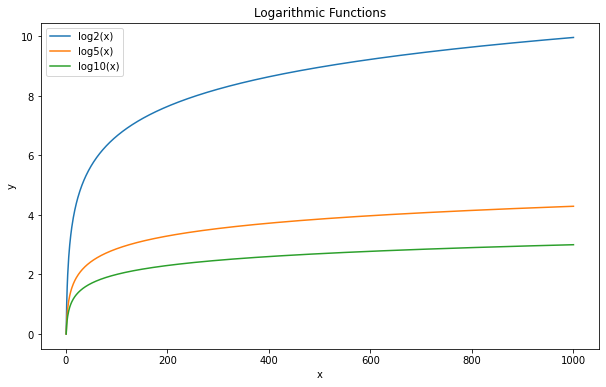

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 生成1到1000的数组
x = np.arange(1, 1001)

# 计算log2、log5和log10函数的值
y_log2 = np.log2(x)
y_log5 = np.log(x) / np.log(5)
y_log10 = np.log10(x)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x, y_log2, label='log2(x)')
plt.plot(x, y_log5, label='log5(x)')
plt.plot(x, y_log10, label='log10(x)')

# 添加标签和标题
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logarithmic Functions')
plt.legend()

# 显示图形
plt.show()


In [2]:
data.columns

OrderedDict([('age',
              Column(age, type=int64, vocab size=74, min=17, max=90, has NaN=False)),
             ('workclass',
              Column(workclass, type=category, vocab size=9, min=?, max=Without-pay, has NaN=False)),
             ('education',
              Column(education, type=category, vocab size=16, min=10th, max=Some-college, has NaN=False)),
             ('education_num',
              Column(education_num, type=int64, vocab size=16, min=1, max=16, has NaN=False)),
             ('marital_status',
              Column(marital_status, type=category, vocab size=7, min=Divorced, max=Widowed, has NaN=False)),
             ('occupation',
              Column(occupation, type=category, vocab size=15, min=?, max=Transport-moving, has NaN=False)),
             ('relationship',
              Column(relationship, type=category, vocab size=6, min=Husband, max=Wife, has NaN=False)),
             ('race',
              Column(race, type=category, vocab size=5, min=Amer-Indi

In [4]:
import math 
allAttrDomain = ['race', 'education', 'marital_status', 'workclass', 'occupation', 'education_num', 'relationship', 'hours_per_week', 'sex', 'age', 'native_country',
                        'marital_status/race', 'education_num/race', 'workclass/marital_status', 'education/sex', 'education_num/marital_status', 'occupation/native_country', 
                        'age/hours_per_week', 'race/sex', 'marital_status/sex', 'sex/native_country', 'workclass/sex', 'education_num/sex', 'education/hours_per_week', 
                        'age/education_num', 'race/hours_per_week', 'marital_status/hours_per_week', 'occupation/race', 'workclass/hours_per_week', 'education_num/hours_per_week', 
                        'age/native_country', 'workclass/education', 'education/education_num', 'age/occupation', 'occupation/sex', 'education/native_country', 'workclass/education_num', 
                        'race/native_country', 'education/occupation', 'marital_status/native_country', 'age/race', 'workclass/native_country', 'education_num/native_country', 
                        'occupation/hours_per_week', 'age/workclass', 'marital_status/occupation', 'workclass/occupation', 'education/race', 'sex/hours_per_week', 'education_num/occupation', 
                        'hours_per_week/native_country', 'age/sex', 'education/marital_status', 'workclass/race',
                        'workclass/marital_status/sex', 'workclass/education/sex', 'workclass/education_num/sex', 'education_num/marital_status/sex', 'workclass/race/sex', 
                        'education/marital_status/race', 'education/education_num/race', 'workclass/education/education_num', 'education/education_num/marital_status', 'marital_status/race/sex', 
                        'education/marital_status/sex', 'education/education_num/sex', 'workclass/marital_status/race', 'education/race/sex', 'workclass/education/race', 'workclass/education_num/race', 
                        'workclass/education/marital_status',
                        'workclass/marital_status/race/sex']
allAttrDomain_0 = []
allAttrDomain_1 = []
for _ in range(len(allAttrDomain)):
    if _ % 8 != 0:
        allAttrDomain_0.append(allAttrDomain[_])
    # elif _ % 2 == 1:
    allAttrDomain_1.append(allAttrDomain[_])

In [7]:
AA = allAttrDomain_0

allAttrDomain_log2 = []
for a_ in AA:
    allProb = 1
    for i_ in a_.split("/"):
        allProb *= data.columns[i_].vocab_size
    allAttrDomain_log2.append(math.log(allProb, 4))
    
# 计算数组的总和
sum_allAttrDomain_log2 = sum(allAttrDomain_log2)

# 归一化数组，使其和为1
normalized_array = [x / sum_allAttrDomain_log2 for x in allAttrDomain_log2]

print(AA)
print(len(AA))
print("原始数组:", allAttrDomain_log2)
print("归一化后的数组:", normalized_array)

['education', 'marital_status', 'workclass', 'occupation', 'education_num', 'relationship', 'hours_per_week', 'age', 'native_country', 'marital_status/race', 'education_num/race', 'workclass/marital_status', 'education/sex', 'education_num/marital_status', 'age/hours_per_week', 'race/sex', 'marital_status/sex', 'sex/native_country', 'workclass/sex', 'education_num/sex', 'education/hours_per_week', 'race/hours_per_week', 'marital_status/hours_per_week', 'occupation/race', 'workclass/hours_per_week', 'education_num/hours_per_week', 'age/native_country', 'workclass/education', 'age/occupation', 'occupation/sex', 'education/native_country', 'workclass/education_num', 'race/native_country', 'education/occupation', 'marital_status/native_country', 'workclass/native_country', 'education_num/native_country', 'occupation/hours_per_week', 'age/workclass', 'marital_status/occupation', 'workclass/occupation', 'education/race', 'education_num/occupation', 'hours_per_week/native_country', 'age/sex',

In [4]:
# 全部
import math 
allAttrDomain = ['race', 'education', 'marital_status', 'workclass', 'occupation', 'education_num', 'relationship', 'hours_per_week', 'sex', 'age', 'native_country',
                        'marital_status/race', 'education_num/race', 'workclass/marital_status', 'education/sex', 'education_num/marital_status', 'occupation/native_country', 
                        'age/hours_per_week', 'race/sex', 'marital_status/sex', 'sex/native_country', 'workclass/sex', 'education_num/sex', 'education/hours_per_week', 
                        'age/education_num', 'race/hours_per_week', 'marital_status/hours_per_week', 'occupation/race', 'workclass/hours_per_week', 'education_num/hours_per_week', 
                        'age/native_country', 'workclass/education', 'education/education_num', 'age/occupation', 'occupation/sex', 'education/native_country', 'workclass/education_num', 
                        'race/native_country', 'education/occupation', 'marital_status/native_country', 'age/race', 'workclass/native_country', 'education_num/native_country', 
                        'occupation/hours_per_week', 'age/workclass', 'marital_status/occupation', 'workclass/occupation', 'education/race', 'sex/hours_per_week', 'education_num/occupation', 
                        'hours_per_week/native_country', 'age/sex', 'education/marital_status', 'workclass/race',
                        'workclass/marital_status/sex', 'workclass/education/sex', 'workclass/education_num/sex', 'education_num/marital_status/sex', 'workclass/race/sex', 
                        'education/marital_status/race', 'education/education_num/race', 'workclass/education/education_num', 'education/education_num/marital_status', 'marital_status/race/sex', 
                        'education/marital_status/sex', 'education/education_num/sex', 'workclass/marital_status/race', 'education/race/sex', 'workclass/education/race', 'workclass/education_num/race', 
                        'workclass/education/marital_status',
                        'workclass/marital_status/race/sex']
allAttrDomain_ = []
allAttrDomain_log2 = []
for a_ in allAttrDomain:
    allProb = 1
    for i_ in a_.split("/"):
        allProb *= data.columns[i_].vocab_size
    allAttrDomain_.append(allProb)
    allAttrDomain_log2.append(math.log(allProb, 4))
    
print(sum(allAttrDomain_))
# 计算数组的总和
sum_allAttrDomain_log2 = sum(allAttrDomain_log2)

# 归一化数组，使其和为1
normalized_array = [x / sum_allAttrDomain_log2 for x in allAttrDomain_log2]

print("原始数组:", allAttrDomain_log2)
print("归一化后的数组:", normalized_array)

40983
原始数组: [1.160964047443681, 2.0, 1.403677461028802, 1.5849625007211563, 1.9534452978042594, 2.0, 1.292481250360578, 3.292481250360578, 0.5, 3.1047266828144755, 2.6961587113893803, 2.564641508472483, 3.160964047443681, 2.9886399617499584, 2.5, 3.403677461028802, 4.64960400919364, 6.397207933175053, 1.6609640474436813, 1.9036774610288019, 3.19615871138938, 2.084962500721156, 2.5, 5.292481250360578, 5.104726682814475, 4.45344529780426, 4.69615871138938, 3.11440934524794, 4.877443751081734, 5.292481250360578, 5.8008853942038545, 3.5849625007211565, 4.0, 5.058171980618734, 2.4534452978042594, 4.69615871138938, 3.5849625007211565, 3.857122758833061, 3.9534452978042594, 4.099836172418182, 4.265690730258156, 4.281121212110537, 4.69615871138938, 5.245926548164838, 4.689689183535632, 3.357122758833061, 3.538407798525416, 3.160964047443681, 3.792481250360578, 3.9534452978042594, 5.988639961749958, 3.6047266828144746, 3.403677461028802, 2.7459265481648374, 3.4886399617499584, 4.084962500721156

In [10]:
import itertools
num_domain_left = [0, 0, 1, 1, 1, 1]
num_domain_right = [0, 100, 100, 21, 10, 10]

for num_pred in [1, 2, 3, 4]:
    print(num_pred)
    attr_domain = [c for c in list(data.columns) if data.columns[c].vocab_size > num_domain_left[num_pred] and data.columns[c].vocab_size <= num_domain_right[num_pred]]
    if num_pred >= 2 and "relationship" in attr_domain:
            attr_domain.remove("relationship")
    if num_pred == 3 and "occupation" in attr_domain:
        attr_domain.remove("occupation")
    print("attr_domain ", len(attr_domain))

    # 生成不重复的组合，并按照attr_domain中的顺序输出
    unique_combinations = set(itertools.combinations(attr_domain, num_pred))
    # cartesian_product = set(itertools.product(attr_domain, repeat=num_pred))
    print("unique_combinations ", len(unique_combinations))
    for idx, combination in enumerate(unique_combinations):
        combination_list = list(combination)
        # print(combination_list, end=", " if idx < len(unique_combinations) - 1 else "")
        allProb = 1
        for i_ in combination_list:
            allProb *= data.columns[i_].vocab_size
        print(combination_list, allProb)
    print()  # 换行


1
attr_domain  12
unique_combinations  12
['occupation'] 15
['relationship'] 6
['hours_per_week'] 96
['marital_status'] 7
['race'] 5
['education_num'] 16
['native_country'] 42
['sex'] 2
['education'] 16
['age'] 74
['workclass'] 9
['capital_loss'] 99

2
attr_domain  11
unique_combinations  55
['education_num', 'capital_loss'] 1584
['sex', 'capital_loss'] 198
['education_num', 'occupation'] 240
['marital_status', 'sex'] 14
['workclass', 'marital_status'] 63
['education', 'marital_status'] 112
['occupation', 'hours_per_week'] 1440
['age', 'capital_loss'] 7326
['workclass', 'sex'] 18
['age', 'occupation'] 1110
['education', 'sex'] 32
['education_num', 'native_country'] 672
['workclass', 'education_num'] 144
['education', 'education_num'] 256
['occupation', 'race'] 75
['sex', 'native_country'] 84
['workclass', 'education'] 144
['race', 'capital_loss'] 495
['age', 'native_country'] 3108
['sex', 'hours_per_week'] 192
['education_num', 'hours_per_week'] 1536
['hours_per_week', 'native_country'

In [3]:
import itertools

num_domain_left = [0, 0, 1, 1, 1, 1]
num_domain_right = [0, 100, 100, 21, 10, 10]

with open("hxh_9_col.txt", "w") as file:
    for num_pred in [1, 2, 3, 4]:
        # file.write(f"{num_pred}\n")
        attr_domain = [c for c in list(data.columns) if data.columns[c].vocab_size > num_domain_left[num_pred] and data.columns[c].vocab_size <= num_domain_right[num_pred] and c != "capital_loss"]
        
        if num_pred >= 2 and "relationship" in attr_domain:
            attr_domain.remove("relationship")
        if num_pred == 3 and "occupation" in attr_domain:
            attr_domain.remove("occupation")
            
        # 生成不重复的组合，并按照attr_domain中的顺序输出
        unique_combinations = set(itertools.combinations(attr_domain, num_pred))
        
        # file.write(f"attr_domain {len(attr_domain)}\n")
        
        for idx, combination in enumerate(unique_combinations):
            combination_list = list(combination)
            file.write(f"'{'/'.join(combination_list)}'")
            if idx < len(unique_combinations) - 1:
                file.write(", ")
        file.write("\n\n")


In [3]:
import pickle
import numpy as np
import pandas as pd
# 指定.pkl文件的路径
# file_path = 'data/census13/original.pkl'
# file_path = 'data/census13/workload/base.pkl'
# file_path = 'data/census13/workload/base-original-label.pkl'
# file_path = 'data/census13/original.table.pkl'
# file_path = 'data/census13/lstm/original_lstm-small_200_123.pkl'
# file_path = 'data/census13/lw/original_base_200_123.pkl'
# file_path = 'data/census13/workload/lstm-original-label.pkl'
# file_path = 'data/census13/workload/lstm-small-original-label.pkl'
file_path = 'data/census13/workload/lstm-small.pkl'



# 打开文件并读取数据
with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [4]:
data

{'train': [Query(predicates=OrderedDict([('age', None), ('workclass', None), ('education', None), ('education_num', None), ('marital_status', None), ('occupation', None), ('relationship', None), ('race', None), ('sex', None), ('capital_gain', None), ('capital_loss', ('<=', 481.7155957893595)), ('hours_per_week', ('[]', (15.084211207326682, 64.91578879267331))), ('native_country', None)]), ncols=2),
  Query(predicates=OrderedDict([('age', None), ('workclass', None), ('education', None), ('education_num', None), ('marital_status', None), ('occupation', None), ('relationship', None), ('race', None), ('sex', None), ('capital_gain', None), ('capital_loss', ('<=', 1963.4105596951154)), ('hours_per_week', ('[]', (17.662259307119466, 32.33774069288053))), ('native_country', None)]), ncols=2),
  Query(predicates=OrderedDict([('age', None), ('workclass', None), ('education', None), ('education_num', None), ('marital_status', None), ('occupation', None), ('relationship', None), ('race', None), ('

In [17]:
data.data.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [10]:
data.columns["workclass"].vocab

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [18]:
data.columns["workclass"].value_2_domain

{'?': 0.0,
 'Federal-gov': 0.125,
 'Local-gov': 0.25,
 'Never-worked': 0.375,
 'Private': 0.5,
 'Self-emp-inc': 0.625,
 'Self-emp-not-inc': 0.75,
 'State-gov': 0.875,
 'Without-pay': 1.0}

In [12]:
data.columns["age"].vocab

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

In [9]:
data.columns["age"].value_2_domain

{17: 0.0,
 18: 0.01369863,
 19: 0.02739726,
 20: 0.04109589,
 21: 0.05479452,
 22: 0.06849315,
 23: 0.08219178,
 24: 0.09589041,
 25: 0.10958904,
 26: 0.12328767,
 27: 0.1369863,
 28: 0.15068494,
 29: 0.16438356,
 30: 0.1780822,
 31: 0.19178082,
 32: 0.20547946,
 33: 0.21917808,
 34: 0.23287672,
 35: 0.24657534,
 36: 0.26027396,
 37: 0.2739726,
 38: 0.28767124,
 39: 0.30136988,
 40: 0.31506848,
 41: 0.32876712,
 42: 0.34246576,
 43: 0.3561644,
 44: 0.369863,
 45: 0.38356164,
 46: 0.39726028,
 47: 0.41095892,
 48: 0.42465752,
 49: 0.43835616,
 50: 0.4520548,
 51: 0.46575344,
 52: 0.47945204,
 53: 0.49315068,
 54: 0.5068493,
 55: 0.5205479,
 56: 0.53424656,
 57: 0.5479452,
 58: 0.56164384,
 59: 0.5753425,
 60: 0.5890411,
 61: 0.60273975,
 62: 0.6164383,
 63: 0.63013697,
 64: 0.6438356,
 65: 0.65753424,
 66: 0.6712329,
 67: 0.6849315,
 68: 0.69863015,
 69: 0.7123288,
 70: 0.72602737,
 71: 0.739726,
 72: 0.75342464,
 73: 0.7671233,
 74: 0.7808219,
 75: 0.79452056,
 76: 0.8082192,
 77: 0.82

In [2]:
vars(data)

{'dataset': 'census13',
 'version': 'original',
 'name': 'census13_original',
 'data':        age         workclass  education  education_num      marital_status  \
 0       39         State-gov  Bachelors             13       Never-married   
 1       50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
 2       38           Private    HS-grad              9            Divorced   
 3       53           Private       11th              7  Married-civ-spouse   
 4       28           Private  Bachelors             13  Married-civ-spouse   
 ...    ...               ...        ...            ...                 ...   
 48837   39           Private  Bachelors             13            Divorced   
 48838   64                 ?    HS-grad              9             Widowed   
 48839   38           Private  Bachelors             13  Married-civ-spouse   
 48840   44           Private  Bachelors             13            Divorced   
 48841   35      Self-emp-inc  Bachelors     

In [2]:
data.columns["age"].normalize(39).item()

0.30136987566947937

In [11]:
data.columns["workclass"].normalize("Federal-gov").item()

0.125

In [43]:
for str_ in ['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']:
    print(data.columns["workclass"].normalize(str_).item())

0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
1.0


In [9]:
col_name = "capital_gain"
col_list = np.sort(np.unique(data.data[col_name]))
for str_ in col_list:
    print(data.columns[col_name].normalize(str_).item())

0.0
0.0011400113580748439
0.004010040313005447
0.005940059199929237
0.009140091016888618
0.00991009920835495
0.010550105944275856
0.010860108770430088
0.011110111139714718
0.01151011511683464
0.011730117723345757
0.012640126049518585
0.014090141281485558
0.014240141957998276
0.014550145715475082
0.014710146933794022
0.015060150995850563
0.016390163451433182
0.01731017231941223
0.01797018013894558
0.0183101836591959
0.01848018541932106
0.020090200006961823
0.020360203459858894
0.02050020545721054
0.020620206370949745
0.021050211042165756
0.02174021676182747
0.02176021784543991
0.02202022075653076
0.022280223667621613
0.022900229319930077
0.023290233686566353
0.023460235446691513
0.023540236055850983
0.023870239034295082
0.024070240557193756
0.024140240624547005
0.024630246683955193
0.025380253791809082
0.025800257921218872
0.025970259681344032
0.026350263506174088
0.02653026580810547
0.0282902829349041
0.028850289061665535
0.029070289805531502
0.029360294342041016
0.029610296711325645
0

In [8]:
col_list

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

In [38]:
vs = np.sort(np.unique(data.data["workclass"]))
vs

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [28]:
data.data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,?,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [23]:
data_nor = data.normalize()

In [26]:
data_nor

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.875,0.600000,0.800000,0.666667,0.071429,0.2,1.00,1.0,0.021740,0.0,0.397959,0.951219
1,0.452055,0.750,0.600000,0.800000,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.0,0.122449,0.951219
2,0.287671,0.500,0.733333,0.533333,0.000000,0.428571,0.2,1.00,1.0,0.000000,0.0,0.397959,0.951219
3,0.493151,0.500,0.066667,0.400000,0.333333,0.428571,0.0,0.50,1.0,0.000000,0.0,0.397959,0.951219
4,0.150685,0.500,0.600000,0.800000,0.333333,0.714286,1.0,0.50,0.0,0.000000,0.0,0.397959,0.121951
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.301370,0.500,0.600000,0.800000,0.000000,0.714286,0.2,1.00,0.0,0.000000,0.0,0.357143,0.951219
48838,0.643836,0.000,0.733333,0.533333,1.000000,0.000000,0.4,0.50,1.0,0.000000,0.0,0.397959,0.951219
48839,0.287671,0.500,0.600000,0.800000,0.333333,0.714286,0.0,1.00,1.0,0.000000,0.0,0.500000,0.951219
48840,0.369863,0.500,0.600000,0.800000,0.000000,0.071429,0.6,0.25,1.0,0.054551,0.0,0.397959,0.951219


In [13]:
data.get_minmax_dict()

{0: (17, 90),
 1: ('?', 'Without-pay'),
 2: ('10th', 'Some-college'),
 3: (1, 16),
 4: ('Divorced', 'Widowed'),
 5: ('?', 'Transport-moving'),
 6: ('Husband', 'Wife'),
 7: ('Amer-Indian-Eskimo', 'White'),
 8: ('Female', 'Male'),
 9: (0, 99999),
 10: (0, 4356),
 11: (1, 99),
 12: ('?', 'Yugoslavia')}

In [2]:
len(data["train"])

50000

In [3]:
data["train"][:10]

[Query(predicates=OrderedDict([('age', None), ('workclass', None), ('education', None), ('education_num', None), ('marital_status', ('=', 'Divorced')), ('occupation', None), ('relationship', ('=', 'Not-in-family')), ('race', ('=', 'White')), ('sex', ('=', 'Female')), ('capital_gain', None), ('capital_loss', None), ('hours_per_week', None), ('native_country', None)]), ncols=4),
 Query(predicates=OrderedDict([('age', None), ('workclass', None), ('education', None), ('education_num', None), ('marital_status', ('=', 'Never-married')), ('occupation', None), ('relationship', ('=', 'Own-child')), ('race', ('=', 'White')), ('sex', ('=', 'Male')), ('capital_gain', None), ('capital_loss', None), ('hours_per_week', None), ('native_country', None)]), ncols=4),
 Query(predicates=OrderedDict([('age', None), ('workclass', None), ('education', None), ('education_num', None), ('marital_status', ('=', 'Married-civ-spouse')), ('occupation', None), ('relationship', ('=', 'Husband')), ('race', ('=', 'White

In [ ]:
def discretize(self, data):
    """Transforms data values into integers using a Column's vocabulary"""

    # pd.Categorical() does not allow categories be passed in an array
    # containing np.nan.  It makes it a special case to return code -1
    # for NaN values.
    if self.has_nan:
        bin_ids = pd.Categorical(data, categories=self.vocab[1:]).codes
        # Since nan/nat bin_id is supposed to be 0 but pandas returns -1, just
        # add 1 to everybody
        bin_ids = bin_ids + 1
    else:
        # This column has no nan or nat values.
        bin_ids = pd.Categorical(data, categories=self.vocab).codes

    bin_ids = bin_ids.astype(np.int32, copy=False)
    assert (bin_ids >= 0).all(), (self, data, bin_ids)
    return bin_ids

In [48]:
data.columns["workclass"].discretize(data.data['workclass'])

array([7, 6, 4, ..., 4, 4, 5], dtype=int32)

In [51]:

for str_ in ['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']:
    print(data.columns["workclass"].discretize(str_))
    print(type(data.columns["workclass"].discretize(str_)[0]))

[0]
<class 'numpy.int32'>
[1]
<class 'numpy.int32'>
[2]
<class 'numpy.int32'>
[3]
<class 'numpy.int32'>
[4]
<class 'numpy.int32'>
[5]
<class 'numpy.int32'>
[6]
<class 'numpy.int32'>
[7]
<class 'numpy.int32'>
[8]
<class 'numpy.int32'>


In [2]:
members = [attr for attr in vars(data) if not callable(getattr(data, attr))]
members

TypeError: vars() argument must have __dict__ attribute

In [3]:
'explain(analyze, format json) SELECT * FROM "census13_original" WHERE workclass = \'Private\''
SELECT * FROM census13_original WHERE workclass = 'Private';

TypeError: vars() argument must have __dict__ attribute

In [29]:
for keys in data.keys():
    print("type(data[keys]) ", type(data[keys]))
    print("len(data[keys])", len(data[keys]))
    for tu_ in data[keys]:
        print(keys, "len(tu_)", len(tu_))
        print(tu_[0])
    break

type(data[keys])  <class 'tuple'>
len(data[keys]) 3
train len(tu_) 100000
[   0.         1000.          500.          500.            0.
 1000.            0.         1000.          666.66668653  666.66668653
    0.         1000.          200.00000298  200.00000298    0.
 1000.         1000.         1000.            0.           93.03035587
    0.         1000.            0.         1000.          951.21949911
  951.21949911    9.17242751   12.14625045   13.61930296]
train len(tu_) 100000
11.38586240064146
train len(tu_) 100000
2675


In [16]:
import math

result = math.pow(10, 4.5)
print(result)

31622.776601683792


In [11]:
import torch

# 示例文本序列
text_sequence_1 = [
    torch.FloatTensor([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]]),
    torch.FloatTensor([[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]])
]

text_sequence_2 = [
    torch.FloatTensor([[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]]),
    torch.FloatTensor([[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]])
]

# 转换为 PyTorch FloatTensor
your_texts = [text_sequence_1, text_sequence_2]

# 输出
print(your_texts)


[[tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]]), tensor([[ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]])], [tensor([[ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.]]), tensor([[ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]])]]


In [52]:
import numpy as np
import pandas as pd

my_list = [23, 45, 12, 34, 23, 34]

# 使用NumPy进行排序
sorted_array = np.sort(my_list)

# 使用Pandas创建DataFrame
df = pd.DataFrame(sorted_array, columns=['values'])

# 计算累计小于等于每个值的数量
df['count'] = df.groupby('values').cumcount() + 1

# 计算比例
df['ratio'] = df['count'] / len(df)

# 去重，获取每个唯一值对应的最终结果
result = df.drop_duplicates(subset='values', keep='last')[['values', 'count', 'ratio']].reset_index(drop=True)

print(result)


   values  count     ratio
0      12      1  0.166667
1      23      2  0.333333
2      34      2  0.333333
3      45      1  0.166667


In [30]:
import pandas as pd

# Your DataFrame
# data = {'col1': ["hello", "appple", "?", "chdis", "chdis"],
#         'col2': [1, 2, 2, 1, 1],
#         'col3': [3, 4, 5, 6, 6]}

# df = pd.DataFrame(data)

data = data

# Sort by 'col1' and 'col2' in ascending order
df_sorted = df.sort_values(by=['col1', 'col2']).reset_index(drop=True)

# Calculate cumulative count and ratio
count_df = df_sorted.groupby(df_sorted.columns.tolist()).cumcount() + 1
ratio_df = count_df / len(df_sorted)

# Add count and ratio columns to the original DataFrame
df['count'] = count_df
df['ratio'] = ratio_df

# Drop duplicates to get the final result
result = df.drop_duplicates().reset_index(drop=True)

print(result)


     col1  col2  col3  count  ratio
0   hello     1     3      1    0.2
1  appple     2     4      1    0.2
2       ?     2     5      1    0.2
3   chdis     1     6      2    0.4
4   chdis     1     6      1    0.2


In [25]:
import pandas as pd

df = pd.DataFrame(["hello", "appple", "?", "chdis"], columns=['col1'])

# Sort values in ascending order
df_sorted = df.sort_values(by='col1').reset_index(drop=True)

print(df_sorted)


     col1
0       ?
1  appple
2   chdis
3   hello


In [25]:
import pandas as pd

# Your DataFrame
# data = {'col1': ["hello", "appple", "?", "chdis", "chdis"],
#         'col2': [1, 2, 2, 1, 1],
#         'col3': [3, 4, 5, 6, 6]}

# df = pd.DataFrame(data)
# 从data中选择'capital_loss'和'hours_per_week'两列
selected_columns = ['capital_loss', 'hours_per_week']
selected_data = data.data[selected_columns]

# 将选择的数据转换为DataFrame
df = pd.DataFrame(selected_data)

# Sort by 'col1' and 'col2' in ascending order
df_sorted = df.sort_values(by=selected_columns).reset_index(drop=True)
type(df_sorted)



pandas.core.frame.DataFrame

In [28]:
# Count the occurrences of each unique row
row_counts = df_sorted.groupby(df_sorted.columns.tolist()).size().reset_index(name='count')

# Calculate the percentage of each row's occurrence in the total number of rows
row_counts['percentage'] = row_counts['count'] / len(df_sorted)
# Calculate the cumulative probability
row_counts['cumulative_probability'] = row_counts['percentage'].cumsum()

# Display the result
print(row_counts)


     capital_loss  hours_per_week  count  percentage  cumulative_probability
0               0               1     25    0.000512                0.000512
1               0               2     50    0.001024                0.001536
2               0               3     55    0.001126                0.002662
3               0               4     83    0.001699                0.004361
4               0               5     92    0.001884                0.006245
..            ...             ...    ...         ...                     ...
742          3770              40      2    0.000041                0.999877
743          3770              45      1    0.000020                0.999898
744          3900              40      2    0.000041                0.999939
745          4356              18      1    0.000020                0.999959
746          4356              40      2    0.000041                1.000000

[747 rows x 5 columns]


In [18]:
# Count the occurrences of each unique row
row_counts = df_sorted.groupby(df_sorted.columns.tolist()).size().reset_index(name='count')

# Calculate the percentage of each row's occurrence in the total number of rows
# row_counts['percentage'] = row_counts['count'] / len(df_sorted)
# Calculate the cumulative probability
row_counts['cumulative_probability'] =  (row_counts['count'] / len(df_sorted)).cumsum()

# Display the result
print(row_counts)


     capital_loss  hours_per_week  count  cumulative_probability
0               0               1     25                0.000512
1               0               2     50                0.001536
2               0               3     55                0.002662
3               0               4     83                0.004361
4               0               5     92                0.006245
..            ...             ...    ...                     ...
742          3770              40      2                0.999877
743          3770              45      1                0.999898
744          3900              40      2                0.999939
745          4356              18      1                0.999959
746          4356              40      2                1.000000

[747 rows x 4 columns]


In [27]:
# Count the occurrences of each unique row
row_counts = df_sorted.groupby(df_sorted.columns.tolist()).size().reset_index(name='count')

# Calculate the cumulative probability directly using cumsum
row_counts['cumulative_probability'] = row_counts['count'].cumsum() / len(df_sorted)

# Display the result
print(row_counts)


     capital_loss  hours_per_week  count  cumulative_probability
0               0               1     25                0.000512
1               0               2     50                0.001536
2               0               3     55                0.002662
3               0               4     83                0.004361
4               0               5     92                0.006245
..            ...             ...    ...                     ...
742          3770              40      2                0.999877
743          3770              45      1                0.999898
744          3900              40      2                0.999939
745          4356              18      1                0.999959
746          4356              40      2                1.000000

[747 rows x 4 columns]


In [23]:
# Calculate the cumulative probability directly using cumsum on the size
cumulative_probability = df_sorted.groupby(df_sorted.columns.tolist()).size().cumsum() / len(df_sorted)

# Create a DataFrame with the cumulative probability
result_df = pd.DataFrame({'cumulative_probability': cumulative_probability}).reset_index()

# Display the result
print(result_df)


     capital_loss  hours_per_week  cumulative_probability
0               0               1                0.000512
1               0               2                0.001536
2               0               3                0.002662
3               0               4                0.004361
4               0               5                0.006245
..            ...             ...                     ...
742          3770              40                0.999877
743          3770              45                0.999898
744          3900              40                0.999939
745          4356              18                0.999959
746          4356              40                1.000000

[747 rows x 3 columns]


In [21]:
# Calculate the cumulative probability directly using cumsum on the size
cumulative_probability = df_sorted.groupby(df_sorted.columns.tolist()).size().cumsum() / len(df_sorted)

In [22]:
cumulative_probability

capital_loss  hours_per_week
0             1                 0.000512
              2                 0.001536
              3                 0.002662
              4                 0.004361
              5                 0.006245
                                  ...   
3770          40                0.999877
              45                0.999898
3900          40                0.999939
4356          18                0.999959
              40                1.000000
Length: 747, dtype: float64

In [22]:
import pandas as pd
import numpy as np
np.sort(["hello", "appple", "?", "chdis"])

array(['?', 'appple', 'chdis', 'hello'], dtype='<U6')